In [1]:
# Pacotes básicos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pacotes do Scikit-learn para acesso a datasets, preparação, modelagem e avaliação
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Pacotes para modelos de aprendizado
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Pacote de balanceamento de classes desbalanceadas
# from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_curve, roc_auc_score, auc

In [3]:
df = pd.read_csv("treino.csv")
# Informações gerais do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   IDpassageiro   1000 non-null   object
 1   Nome           1000 non-null   object
 2   Deck           1000 non-null   object
 3   NumeroCabine   1000 non-null   int64 
 4   PosicaoCabine  1000 non-null   object
 5   Procedencia    1000 non-null   object
 6   Destino        1000 non-null   object
 7   Idade          1000 non-null   int64 
 8   VIP            1000 non-null   bool  
 9   AllInclusive   1000 non-null   bool  
 10  ServicoCabine  1000 non-null   int64 
 11  Restaurante    1000 non-null   int64 
 12  Shopping       1000 non-null   int64 
 13  SPA            1000 non-null   int64 
 14  ParquedeAguas  1000 non-null   int64 
 15  Sobrevivente   1000 non-null   bool  
dtypes: bool(3), int64(7), object(6)
memory usage: 104.6+ KB


In [6]:
df.describe()

,NumeroCabine,Idade,ServicoCabine,Restaurante,Shopping,SPA,ParquedeAguas
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,688.466000,39.816000,883.92700,690.624000,7410.141000,1518.977000,356.879000
std,404.869011,23.346203,498.44474,419.069741,4413.046425,861.974722,202.812532
min,1.000000,0.000000,4.00000,3.000000,2.000000,0.000000,0.000000
25%,332.750000,19.000000,473.50000,312.750000,3666.750000,797.750000,184.000000
50%,675.000000,40.000000,878.00000,680.000000,7309.000000,1472.500000,365.500000
75%,1049.500000,61.000000,1297.50000,1045.500000,11279.750000,2297.500000,532.000000
max,1365.000000,79.000000,1741.00000,1425.000000,15234.000000,2955.000000,705.000000


In [7]:
# Número de linhas e colunas
df.shape

(1000, 16)

In [ ]:
print("Numeric features: ",numfeatures(df))

In [ ]:
# df = pd.get_dummies(df, columns=['Procedência'], drop_first=True)
# df = pd.get_dummies(df, columns=['Destino'], drop_first=True)

Numeric features:  ['NumeroCabine', 'Idade', 'ServicoCabine', 'Restaurante', 'Shopping', 'SPA', 'ParquedeAguas']


<Axes: >

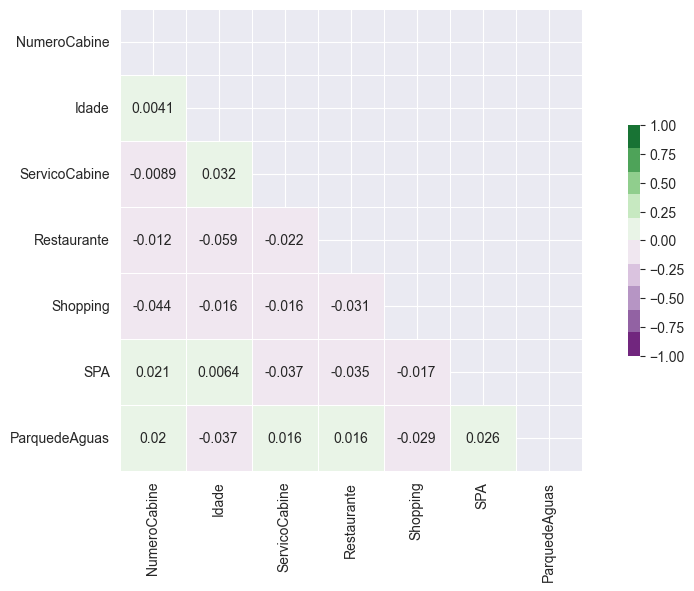

In [10]:
def numfeatures(X):
    return(X.describe().columns.tolist())

print("Numeric features: ",numfeatures(df))

df_num=df[numfeatures(df)]
corr=df_num.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(12,6))
cmap = sns.color_palette("PRGn",10)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1,vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)

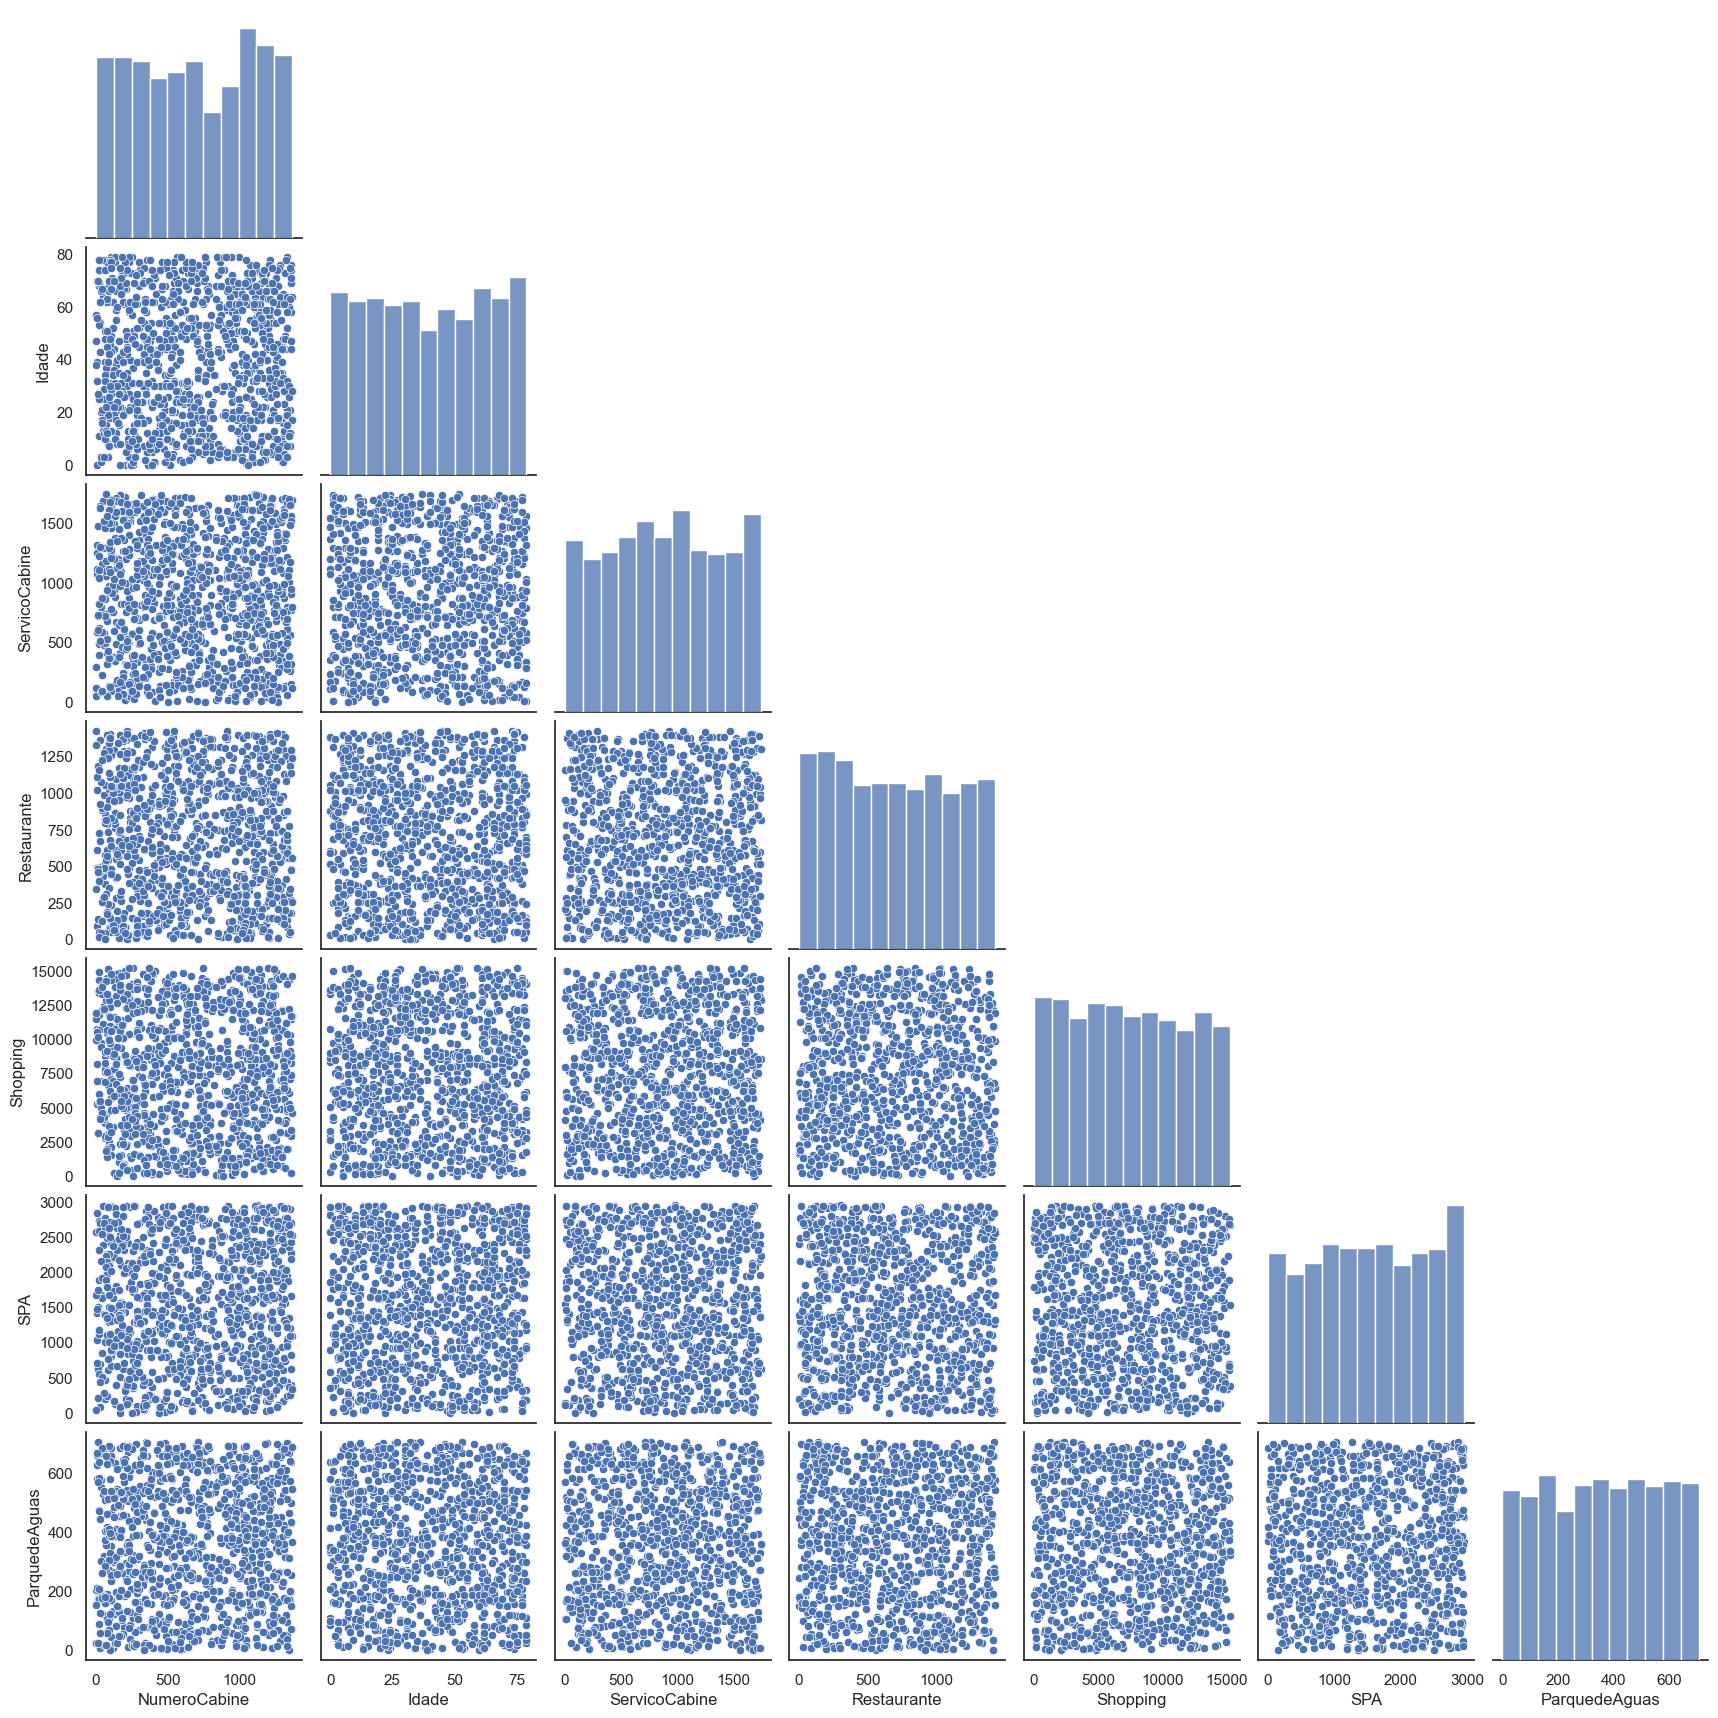

In [11]:
train_num=df[numfeatures(df)]
sns.set(style="white")
sns.pairplot(train_num,corner=True)

   GrupoHetário  Sobrevivente
0          Bebê      0.596491
1       Criança      0.536842
2   Adolescente      0.466667
3  Jovem Adulto      0.477477
4        Adulto      0.531136
5         Idoso      0.565543


C:\Users\Lais_Ziegler\AppData\Local\Temp\ipykernel_87456\2919623845.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df[["GrupoHetário","Sobrevivente"]].groupby(["GrupoHetário"],as_index=False).mean())


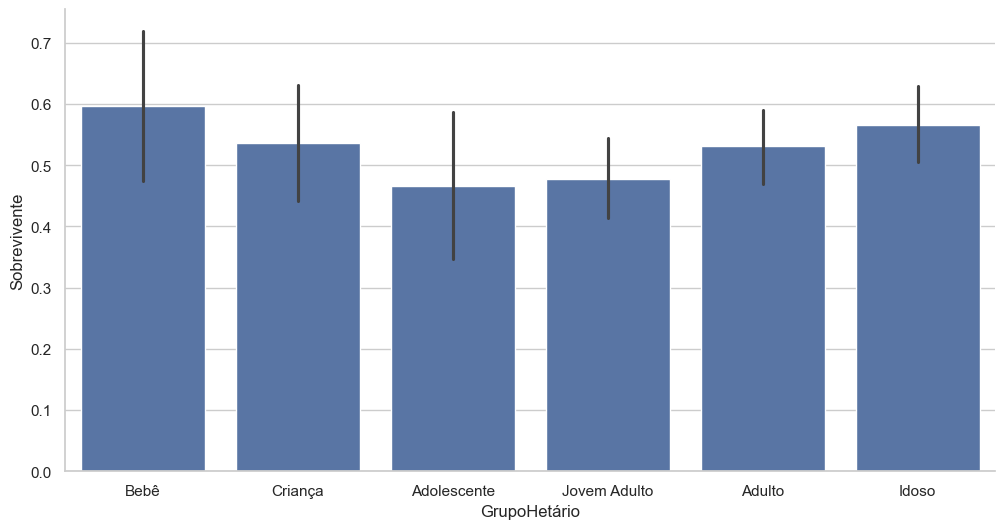

In [24]:
from matplotlib import pyplot

bins = [0, 5, 12, 18, 35, 60, np.inf]

labels = ['Bebê', 'Criança', 'Adolescente', 'Jovem Adulto', 'Adulto', 'Idoso']
df['GrupoHetário'] = pd.cut(df["Idade"], bins, labels = labels)

sns.set(style="whitegrid")
fig, ax = pyplot.subplots(figsize=(12,6))
colors=["#80CEE1","#FFB6C1"]
customPalette=sns.set_palette(sns.color_palette(colors))
print(df[["GrupoHetário","Sobrevivente"]].groupby(["GrupoHetário"],as_index=False).mean())
sns.barplot(x="GrupoHetário",y="Sobrevivente",data=df,ax=ax,palette=customPalette)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

C:\Users\Lais_Ziegler\AppData\Local\Temp\ipykernel_87456\3813607065.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df[["GrupoHetário","Sobrevivente", "VIP"]].groupby(["GrupoHetário"],as_index=False).mean())


   GrupoHetário  Sobrevivente       VIP
0          Bebê      0.596491  0.508772
1       Criança      0.536842  0.421053
2   Adolescente      0.466667  0.453333
3  Jovem Adulto      0.477477  0.450450
4        Adulto      0.531136  0.509158
5         Idoso      0.565543  0.561798


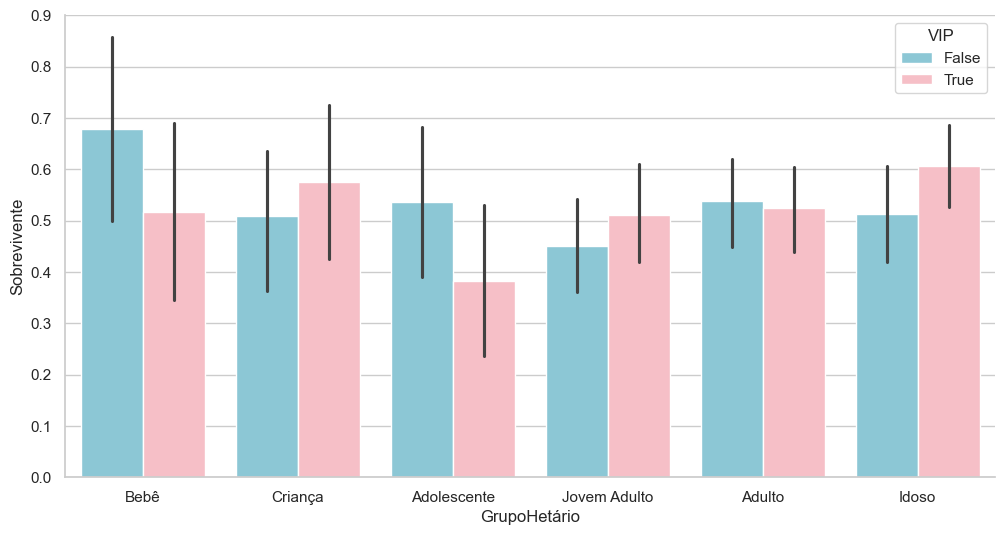

In [30]:


fig, ax = pyplot.subplots(figsize=(12,6))
sns.barplot(x="GrupoHetário", y="Sobrevivente", data=df,hue="VIP",ax=ax)

colors=["#80CEE1","#FFB6C1"]
customPalette=sns.set_palette(sns.color_palette(colors))
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)